In [13]:
import numpy as np
import arviz as az
import os, sys
from pathlib import Path

In [20]:
fp = Path("./test2/")

In [22]:
sys.path.append("../../")
from importlib import reload
import helpers
reload(helpers)

<module 'helpers' from '../../helpers/__init__.py'>

In [34]:
samples = helpers.load_samples(fp)

In [35]:
samples["lb"]

array([[7., 7., 7., ..., 1., 1., 1.],
       [7., 7., 7., ..., 1., 1., 1.],
       [7., 7., 7., ..., 1., 1., 1.],
       ...,
       [7., 7., 7., ..., 1., 1., 1.],
       [7., 7., 7., ..., 1., 1., 1.],
       [7., 7., 7., ..., 1., 1., 1.]])

In [17]:
posteriors = {}
for filename in os.listdir(fp):
    if not filename.endswith(".npy"):
        continue
    posteriors[filename.rstrip(".npy")] = np.load(fp / filename)

In [4]:
posteriors.get("fault4")

array([ 33.46252367,  44.08214599,  49.06924624,   8.27681794,
       -35.33774651,   0.88517851,  16.77578287,  35.56783601,
        26.41274986,  34.0451595 ,  26.74786038,  26.142702  ,
       -21.26563041,  28.94915307,  -1.34150994,  -6.31513403,
        15.45323928,  19.87751599,  14.79417056, -10.09357211,
         1.47544596,   9.66716103, -16.01208341,  27.65274072,
       -12.36131154,   1.28319868, -34.0999066 ,  13.09594754,
       -22.65111939,  28.33371572,  20.27262156,  18.33289347,
         2.47849021,  28.86855765, -10.17850537,  -9.74274931,
         9.85806657, -34.67789631,  14.95529625,  18.18385282,
        -1.39620295,  -2.2072543 ,  20.16879522,  11.43351628,
        -6.8180856 ,   9.89893352,   5.08564961, -19.17836668,
        -7.28667775,  23.32319856, -20.03235862, -16.95747878,
        29.81136087,   6.212707  , -36.11240808,  -6.51986226,
        11.25008696, -10.43128808,  24.90762255,  10.73998352,
       -13.50552938,  -1.53141204,  27.03871122,  -1.61

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dd54973d0>],
      dtype=object)

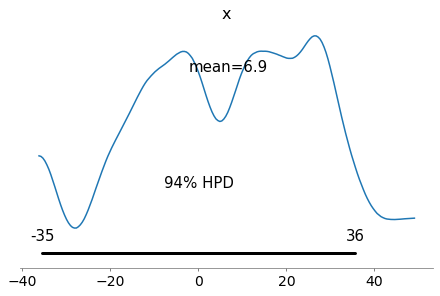

In [5]:
az.plot_posterior(posteriors.get("fault4"))

In [6]:
import matplotlib.pyplot as plt

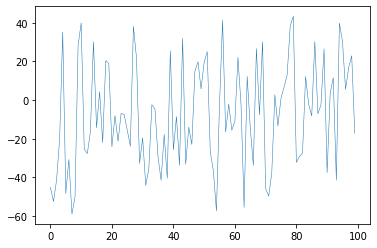

In [7]:
plt.plot(posteriors.get("fault3"), linewidth=0.5)

In [8]:
import sys
sys.path.append("../../")
from helpers import *

In [9]:
priors = read_priors(fp / "priors.json")

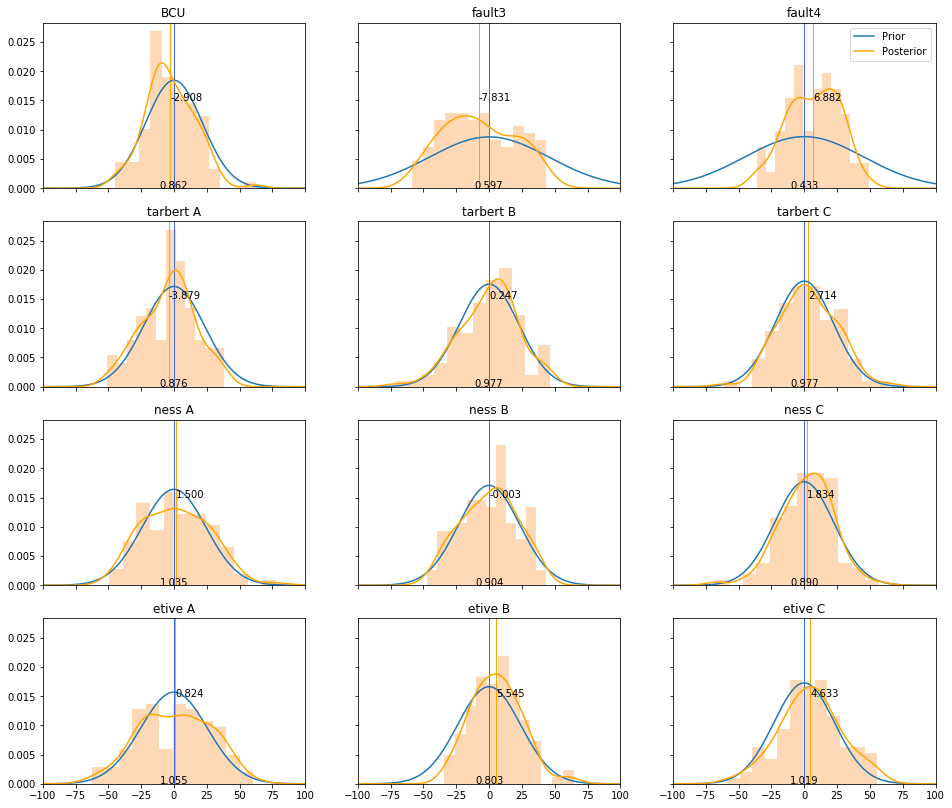

In [10]:
fig, axes = plt.subplots(ncols=3, nrows=len(priors.keys()) // 3, figsize=(16, 3.5 * len(priors.keys()) // 3), sharex=True, sharey=True)
for ax, name in zip(axes.flat, priors.keys()):
    posterior = posteriors.get(name)
    post_stdev = posterior.std()
    post_mean = posterior.mean()
    
    ax.text(post_mean, 0.015, f"{post_mean:.03f}")
    x = np.linspace(post_mean - 6 * post_stdev, post_mean + 6 * post_stdev, 1000)
    
    prior = priors.get(name).pdf(x)
    prior_stdev = priors.get(name).std()
    
    ax.axvline(post_mean, color="orange", linewidth=1)
    ax.axvline(priors.get(name).mean(), color="royalblue", linewidth=1)
    
    ratio = post_stdev / prior_stdev
    ax.text(0, 0, f"{ratio:.03f}", horizontalalignment="center")
    
    ax.plot(x, prior, label="Prior")
    
    kde = scipy.stats.gaussian_kde(posterior)
    ax.hist(posterior, density=True, alpha=0.3, bins=12)
    ax.plot(x, kde.pdf(x), label="Posterior", color="orange")
    ax.set_title(name)
    ax.set_xlim(-100, 100)
    
axes.flat[2].legend()

In [19]:
np.load(fp / "centroids.npy")

array([], dtype=float64)